In [2]:
# Imports used in this report
from IPython import display
from PIL import Image
import pandas as pd
import numpy as np
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
import warnings
warnings.filterwarnings('ignore')

# My implementation of kmeans
from kmeans import *

# Introduction to Clustering: K-means

Clustering is a machine learning concept of grouping together similar records into groups or **clusters**. This concept is most commonly used for **unsupervised** problems, where we are not given the labels with the data. This is a powerful tool since most machine learning models require us to provide labeled data in order to train them. First, I'll discuss the **k-means** implementation of clustering, and how it's been improved. Then, I'll go over some applications using the algorithm, and finish by explaining some disadvantages of clustering.

## K-means

K-means an implementation of clustering that focuses on grouping records based on their distance to a **centroid**, or center point. To explain how algorithm works, consider these points:

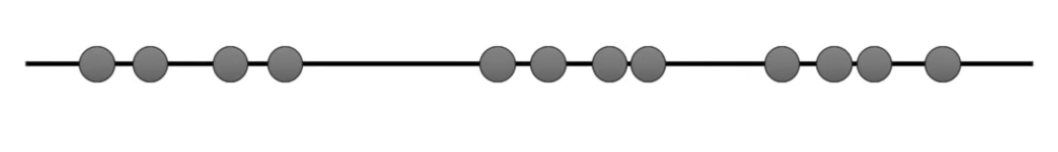

In [3]:
display.Image(filename='img/cluster_start.png')

**Step 1:** Assign Starting Centroids

We can clearly see that there are 3 clusters, so we would tell the algorithm to randomly assign 3 existing data points as starting centroids. Visually, it seems obvious where the center points should be, but once we use data with more than 3 dimensions, we will not be able to look at the data ourselves.

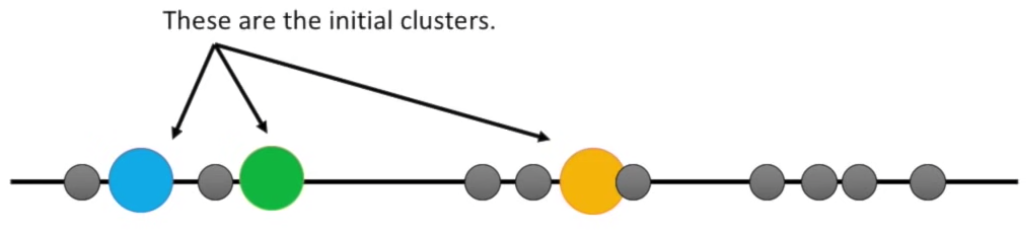

In [4]:
display.Image(filename='img/cluster_step1.png')

**Step 2:** Assign Points to a Cluster

Now we take each point, and measure the distance between it and all the centroids. Then, assign it to the closest one.

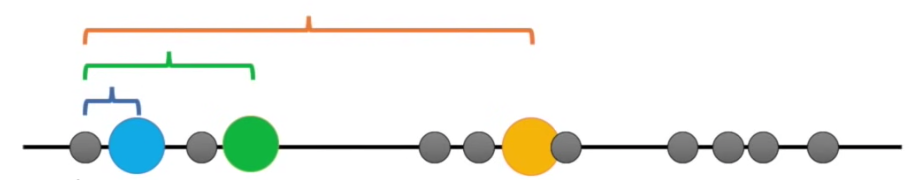

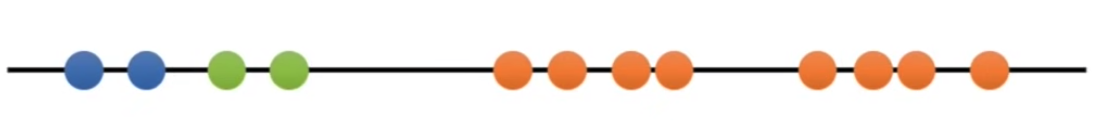

In [9]:
display(display.Image(filename='img/cluster_step2.png'))
display.Image(filename='img/cluster_step3.png')

**Step 3:** Reassign the Centroids

Now that each point is assigned a cluster, we take the mean of each cluster and set it as new centroid.

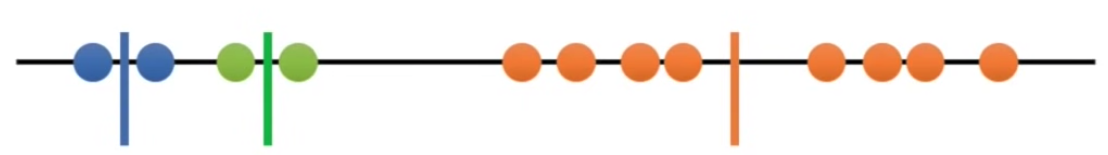

In [10]:
display.Image(filename='img/cluster_step4.png')

**Step 4:** Repeat Reassignment

Once the new centroids are selected, we reassign each point again to the new closest centroid, and then recalculate the centroids again. Essentially, we repeats steps 2 and 3 until our centroids stop changing, or it's taking too much time. Here is our final result:

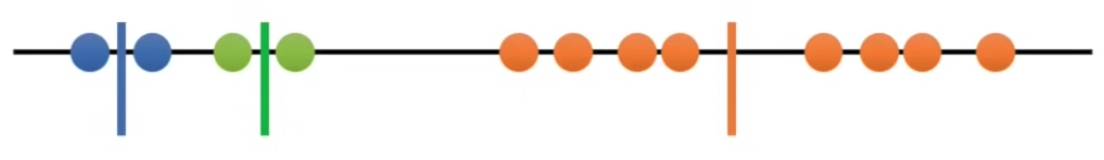

In [12]:
display.Image(filename='img/cluster_final.png')

Visually, we can easily tell that these clusters are not ideal. This is the problem we can run into using random assignment of the initial centroids. K-means++ is one technique that can improve our initial centroid guesses.

### K-means++

K-means++ indentifies the need to make better deciscions when choosing our first centroid points, which will hopefully give us better final clusters after the iterations. Instead of choosing the initial centroids randomly, we pick only pick the first centroid randomly. Then, to find the next centroids, we find the minimum distance to the closest centroid for each point, and assign the maximum of these distances as the new centroid point. We repeat this process until we reach the specified amount of clusters specified by the user.

I have implemented my own version of k-means clustering, including the functionality for k-means++ centroid selection in kmeans.py and will load in my functions to demonstrate a situation where using clustering can be applied in a real world problem using synthetic data.

## K-means Example: Finding Power Users

One of the most common applications of clustering is when we're given a set of tabular numerical data, and we know the number of groups we need to identify. Then we can train a model and use it to label future data.

For example, if we are an online video game company with an in game store where players spend real money, it would help us to know which players are power users that will spend more money. Since we typically don't have vague labels like this in the data, it might be helpful to segment our user-based into two categories: power users and casual players. Once the model is trained, we can use it to predict a user's catergory and market to them differently within the game. In this example, I've generated some data points corresponding to the number of purchases and dollars spent per player.

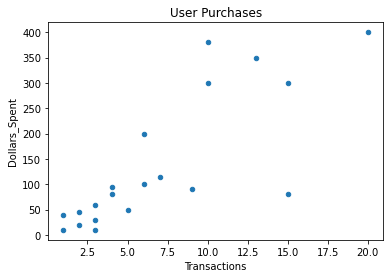

In [13]:
users = pd.read_csv('user_data.csv')
users.plot.scatter(x='Transactions', 
                   y='Dollars_Spent',
                   title='User Purchases')
plt.show()

It seems like there are a lot of small spenders and a few larger ones. Now, let's try to apply k-means with two categories and see the results.

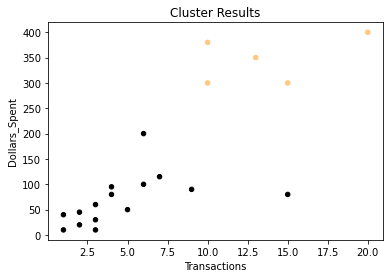

In [14]:
# Returns the final centroids and labels for the data
centroids,labels = kmeans(users.to_numpy(),k=2,centroids='kmeans++')
# Add labels to the data
users['Labels'] = labels
# Plot the results
users.plot.scatter(x='Transactions', 
                   y='Dollars_Spent', 
                   c='Labels', 
                   colormap='copper', 
                   colorbar=False,
                   title='Cluster Results')
plt.show()

Looking at this plot, our k-means algorithm did a decent job seperating out the power users in the top right and casual players in the bottom left. It seems like the point in the bottom right is a close call, but in this example, the cost of getting a classification wrong is not a big deal.

The real power of clustering is giving our data labels which did not exist, which lets us classify new records into our two new categories. We can use this information to show different types of advertisements, or even as an aditional feature for other models.

## Spectral Clustering

One disadvantage of clustering is that certain shapes are not handled well because the generic k-means algorithm uses the minimum euclidean distance as a metric of closeness and averages to recompute the centroids. This means that our generic k-means algorithm will not work well for groups of points that enclose other clusters or pass through them. For example:

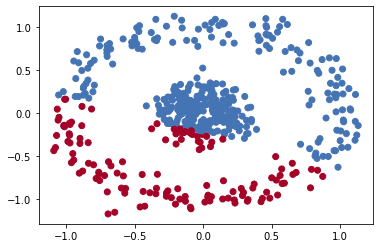

In [15]:
X, _ = make_circles(n_samples=500, noise=0.1, factor=.2)
centroids, labels = kmeans(X, 2, centroids='kmeans++')
colors=np.array(['#4574B4','#A40227'])
plt.scatter(X[:,0], X[:,1], c=colors[labels])
plt.show()

Visually, we can tell that the outer ring is a group, and the inner cluster is another group. Unfortunately, our k-means implementation wasn't able to handle this case. One approach to solving a problem with a nested structure like this is **spectral clustering**. Spectral clustering uses the similarity matrix of the data to perform dimensionality reduction, and then clusters in the reduced dimensions. Here is the result when applied to the same data set: 

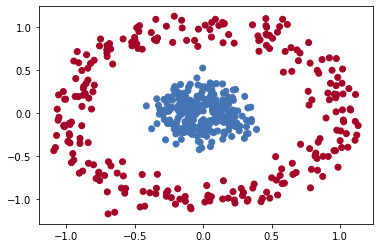

In [21]:
cluster = SpectralClustering(n_clusters=2, affinity="nearest_neighbors")
labels = cluster.fit_predict(X)

colors=np.array(['#4574B4','#A40227'])
plt.scatter(X[:,0], X[:,1], c=colors[labels])
plt.show()

## Disadvantages

* If the labels are given, then other models such as random forest and gradient boosting will out-perform clustering techniques.
* Need to know the number of groups we are looking to find.
* Calculating distances can be very slow as the number of dimention and data points increase.

## Conclusion

In this report, we've explained clustering, and described exactly how the general k-means algorithm functions. Then, we implemented our own version from scratch and applied it to a real-world business problem of grouping different types of users. Finally, we discussed a new areas where ordinary k-means clustering fails and suggested alternative methods.

### References

1. StatQuest: K-means clustering: https://www.youtube.com/watch?v=4b5d3muPQmA
2. Spectral Clustering: https://en.wikipedia.org/wiki/Spectral_clustering